## Machine Learning Predictors



## 2.1 Manufacturers and Rating

## Comparing the distribution of the different manufacturers

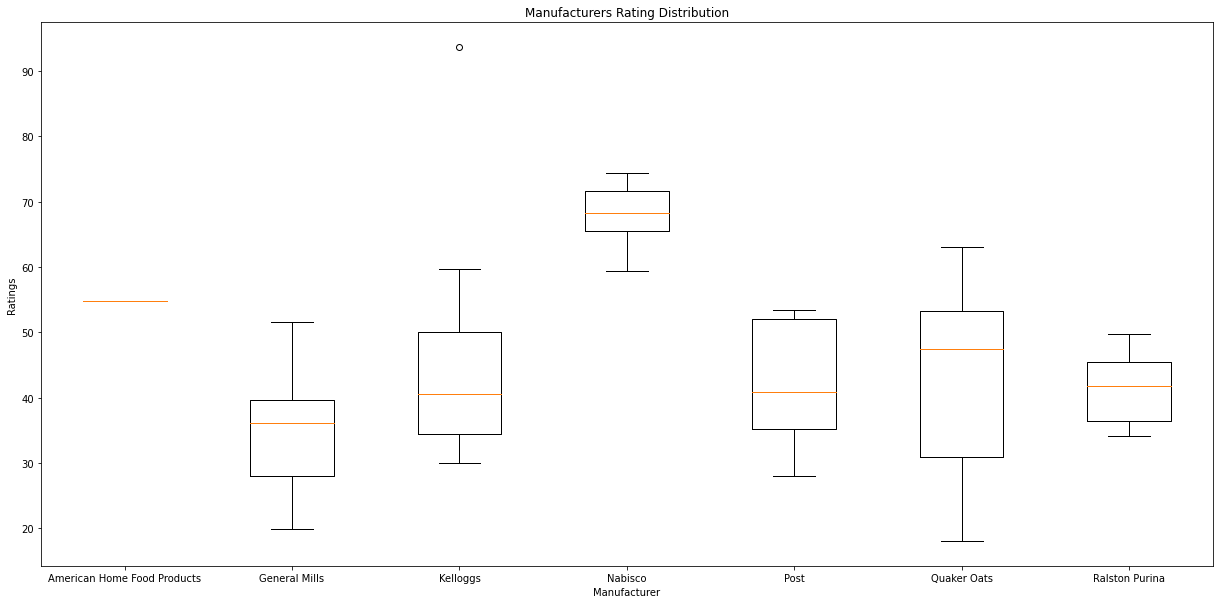

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

# Read in the cereal dataset as dataframe from pandas
data = pd.read_csv('cereal.csv')

# We will make the plot slightly wider so that the boxes are visible
fig, ax = plt.subplots(figsize=(21, 10))

# Get all ratings for each manufucturer from the dataframe, so they can be used in the plot
kellogs = data[data['mfr'] == 'K'].rating

nabisco = data[data['mfr'] == 'N'].rating

general_mills = data[data['mfr'] == 'G'].rating

american_home_f = data[data['mfr'] == 'A'].rating

quaker_oats = data[data['mfr'] == 'Q'].rating

ralston_purina = data[data['mfr'] == 'R'].rating

post = data[data['mfr'] == 'P'].rating

# Create array which contains manufacturer full names to be used as the labels for the boxes in the below plot
manufacturer_full_names = ["American Home Food Products", "General Mills", 
                            "Kelloggs", "Nabisco", "Post","Quaker Oats", 
                            "Ralston Purina", ]

# Plot these ratings as a distribution using a box plot
plt.boxplot([american_home_f, general_mills, kellogs, nabisco, post, quaker_oats, ralston_purina], labels=manufacturer_full_names)

plt.ylabel("Ratings")

plt.xlabel("Manufacturer")

plt.title("Manufacturers Rating Distribution")

plt.show()

## What is the manufacturer with the highest average rating?

In [2]:
import pandas as pd

# Read in the cereal dataset as dataframe from pandas
data = pd.read_csv('cereal.csv')

# Using pandas, group by manufacturer and the get the mean average for each. 
highest_avg_mfr = data.groupby(['mfr']).rating.mean()

# Set the index of the pandas Series to the manufacturer full names to be more readable
highest_avg_mfr.index = manufacturer_full_names

# Display the mean averages for each manufacturer, sorting from highest to lowest
print(f'Highest Manufacturer Averages\n\n{highest_avg_mfr.sort_values(ascending=False)}')

Highest Manufacturer Averages

Nabisco                        67.968567
American Home Food Products    54.850917
Kelloggs                       44.038462
Quaker Oats                    42.915990
Post                           41.705744
Ralston Purina                 41.542997
General Mills                  34.485852
Name: rating, dtype: float64


### The manufacturer with the highest average rating is Nabisco.

## 2.2 Features as Predictors of Rating

## What are the cereal (numerical) features that are stronger predictors of cereal rating?

## Split data into testing and training sets

In [3]:
import pandas as pd

# Function to split data in training and testing
from sklearn.model_selection import train_test_split 

# Read in the cereal dataset as dataframe from pandas
data = pd.read_csv('cereal.csv')

# Set the x input to the numerical values only (excluding rating) 
x = data[data.columns[3:15]].to_numpy()

# Set the y output to the rating values in the dataset, this will be the target of the model
y = data['rating'].to_numpy()

# Split the data into testing and training data (30% testing, 70% training)
X_train, X_test, y_train, y_test = train_test_split(x, y, 
                                            test_size=0.3, random_state=1)
# Print size of training set
print("X_train shape:", X_train.shape)

print("y_train shape:", y_train.shape)

# Print size of test set
print("X_test shape:", X_test.shape)

print("y_test shape:", y_test.shape)

X_train shape: (53, 12)
y_train shape: (53,)
X_test shape: (24, 12)
y_test shape: (24,)


## Create Decision Tree Regressor, Fit Model and Retreive Feature Importances

In [4]:
# Chosen a Decision Tree Regression to classify the importance of cereal features in relation to rating
from sklearn.tree import DecisionTreeRegressor

dtree = DecisionTreeRegressor()

# Fit the Tree to the x and y training data
dtree.fit(X_train, y_train)

# Retrieve the feature importances from the decision tree model
feature_importances = dtree.feature_importances_

## Plot Feature Importances and Display Table

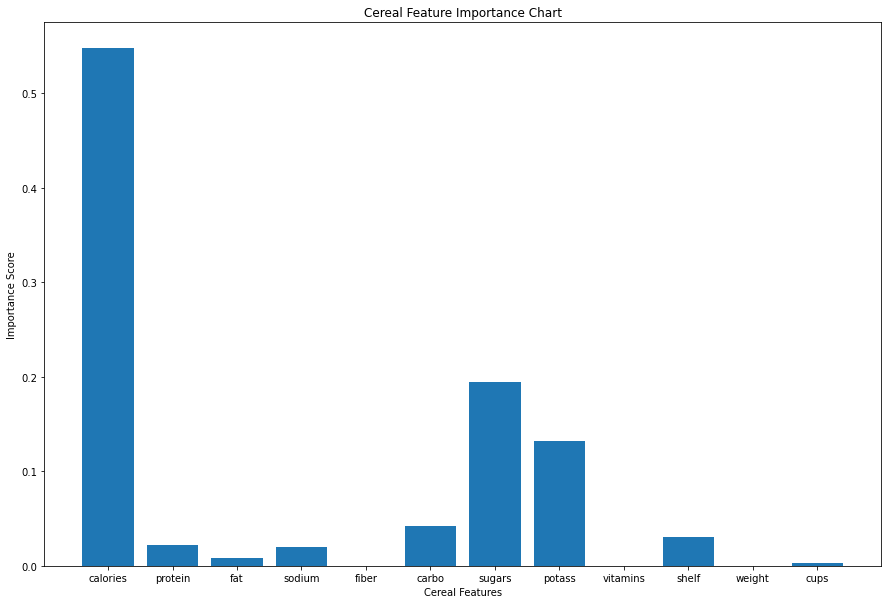

   Feature Name  Importance Score
0      calories          0.547886
6        sugars          0.194536
7        potass          0.131831
5         carbo          0.042375
9         shelf          0.030873
1       protein          0.021866
3        sodium          0.020153
2           fat          0.007837
11         cups          0.002488
4         fiber          0.000119
10       weight          0.000029
8      vitamins          0.000006


In [5]:
# Define the feature names being used so these can be displayed in the plot
feature_names = ['calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups']

# Create an array containing the number of features
bar_x = [i for i in range(len(feature_importances))]

# Plot the results
plt.figure(figsize=(15, 10))

# Set the plot to be a bar chart with the feature importances and names 
plt.bar(bar_x, feature_importances, tick_label=feature_names)

plt.title("Cereal Feature Importance Chart")

plt.ylabel("Importance Score")

plt.xlabel("Cereal Features")

plt.show()

# Creating a dataframe of the feature names and their respective importance scores and sorting it highest to lowest based on the score
df = pd.DataFrame({"Feature Name" : feature_names, "Importance Score" : feature_importances}).sort_values(by='Importance Score', ascending=False)

print(df)

### Calories and Sugars are consistently the most important features.

## How do the top features relate to rating (positively i.e., an increase in them increase the rating; or negatively, ie. an increase in them decrease the rating)?

## Top Two Features Correlation Plots

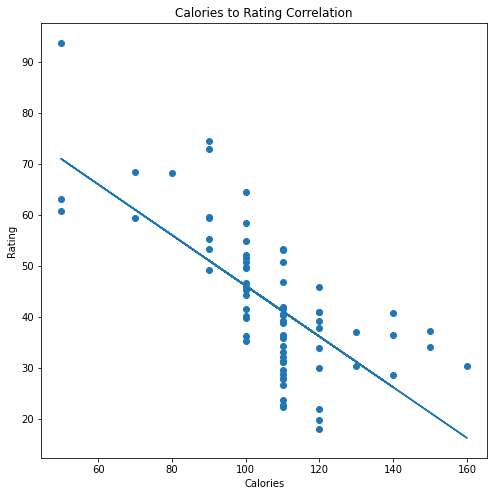

In [6]:
import numpy as np 

plt.figure(figsize=(8, 8))

# Define the axes for the plot
x_axis = data['calories']

y_axis = data['rating']

# Create the initial scatter plot
plt.scatter(x_axis, y_axis)

# Use numpy polyfit to get the values required for the best fit line
m, b = np.polyfit(x_axis, y_axis, 1)

# Calculate best fit line
best_fit_line =  m * x_axis + b

plt.plot(x_axis, best_fit_line)

plt.xlabel('Calories')

plt.ylabel('Rating')

plt.title('Calories to Rating Correlation')

plt.show()

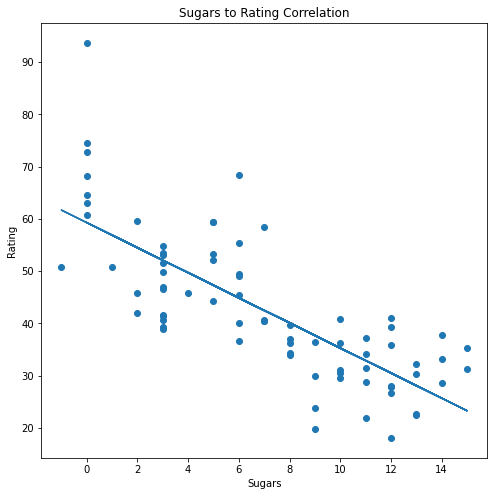

In [7]:
import numpy as np 

plt.figure(figsize=(8, 8))

# Define the axes for the plot
x_axis = data['sugars']

y_axis = data['rating']

# Create the initial scatter plot
plt.scatter(x_axis, y_axis)

# Use numpy polyfit to get the values required for the best fit line
m, b = np.polyfit(x_axis, y_axis, 1)

# Calculate best fit line
best_fit_line =  m * x_axis + b

plt.plot(x_axis, best_fit_line)

plt.xlabel('Sugars')

plt.ylabel('Rating')

plt.title('Sugars to Rating Correlation')

plt.show()

### Sugars and Calories negatively affect the cereal rating.

## Correlation of all cereal features with respect to rating

In [8]:
# Output the correlations of the features to the cereal rating ordered from lowest to highest
print(data.corrwith(data['rating']).sort_values(ascending=True).drop('rating'))

sugars     -0.759675
calories   -0.689376
fat        -0.409284
sodium     -0.401295
weight     -0.298124
vitamins   -0.240544
cups       -0.203160
shelf       0.025159
carbo       0.052055
potass      0.380165
protein     0.470618
fiber       0.584160
dtype: float64
